In [44]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# my models
from Models import KNN
from Models import LinearModels

from Models.HelpFunctions.functions import most_common
from Models.HelpFunctions import metrics
from Models.HelpFunctions import distances as ds
from Models.HelpFunctions.preprocessing import train_test_split


# Regression

In [29]:
X_regression,y_regression = make_regression(1500,14)
# y_regression = y_regression.reshape(-1,1)
X_regression.shape,y_regression.shape

((1500, 14), (1500,))

In [30]:
# train test split
X_regression_train,X_regression_test,y_regression_train,y_regression_test = train_test_split(X_regression,y_regression,0.2,123)

X_regression_train.shape,y_regression_train.shape,X_regression_test.shape,y_regression_test.shape

((1200, 14), (1200,), (300, 14), (300,))

## KNN 

In [43]:
RSS_KNN = []

for k in range(1,20,2):
    knn_regression = KNN.KNNRegressor(k)
    knn_regression.fit(X_regression_train,y_regression_train)
    prediction = knn_regression.predict(X_regression_test)
    score = metrics.RSS(y_regression_test,prediction)
    print(metrics.MSE(y_regression_test,prediction))
    RSS_KNN.append(score)
    print(score)
    print("\n\n\n")


9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857




9.657898393413953
2897.3695180241857






## Linear regression

In [34]:
RSS_linear = []
min_rss = 10000000
for lr in np.linspace(0.01,0.3):
    for iter_  in range(100,1000,100):
        model = LinearModels.LinearRegression(lr,iter_)
        model.fit(X_regression_train,y_regression_train)
        prediction = model.predict(X_regression_test)
        score = metrics.RSS(y_regression_test,prediction)
        print(score)
        RSS_linear.append(score)
        if score < min_rss:
            min_rss = score
            best_lr = lr
            best_iter_ = iter_

1030.8944479949412
377.5631403655347
142.1473377800229
54.827199018469756
21.573723936693348
8.624276932803655
3.4902070152561326
1.4259575454752282
0.586934867957041
564.2067345049263
118.07782637378016
26.232137409755524
6.082067634939673
1.4510744085892524
0.35291302061687607
0.08699295761739632
0.02165707084968495
0.005432710898005882
310.9007603562596
37.955678624021125
5.066298778759113
0.7124148924091461
0.10328900248187575
0.015271263466896145
0.0022887731816229754
0.00034646109864631605
5.284096179043311e-05
172.4517921085813
12.457487467906473
1.004886662593151
0.08566387287437935
0.007532097211673958
0.0006754547970007046
6.139646114992893e-05
5.634805851840756e-06
5.2084202312595e-07
96.24028287436873
4.148051099671261
0.20222454705941126
0.01042811438359306
0.0005547462984027818
3.009296424915348e-05
1.6538667817832957e-06
9.173002873462578e-08
5.122045262713595e-09
53.998226372891224
1.394070704586687
0.04099839508958801
0.0012758363132845758
4.0953103499259584e-05
1.3397

8.536130494256577e-13
8.510956672580164e-13
8.50866241546364e-13
8.54905417078074e-13
1.9350427160433203e-08
8.50146015512321e-13
8.526583446530274e-13
8.550313554780371e-13
8.525260339060312e-13
8.526583446530274e-13
8.54905417078074e-13
8.527846148985185e-13
8.536130494256577e-13
1.0204569224443845e-08
6.236949560392158e-13
6.215055067337019e-13
6.215055067337019e-13
6.23786016322193e-13
6.215055067337019e-13
6.210992061828562e-13
6.215055067337019e-13
6.215055067337019e-13
5.361118106933284e-09
6.210992061828562e-13
6.215968877581896e-13
6.23786016322193e-13
6.215055067337019e-13
6.210992061828562e-13
6.240995667103935e-13
6.23786016322193e-13
6.210992061828562e-13
2.8056860189975635e-09
6.23786016322193e-13
6.215968877581896e-13
6.215055067337019e-13
6.236949560392158e-13
6.236949560392158e-13
6.210992061828562e-13
6.236949560392158e-13
6.243523152277e-13
1.4624999782908118e-09
6.316723734504622e-13
6.317079645311889e-13
6.317079645311889e-13
6.317079645311889e-13
6.317079645311889

In [39]:
print(F"Minimun RSS: {min_rss}\n\tNumber of iterations: {best_iter_}\n\tLearning rate: {best_lr}")

Minimun RSS: 6.210788841781751e-13
	Number of iterations: 500
	Learning rate: 0.2940816326530612


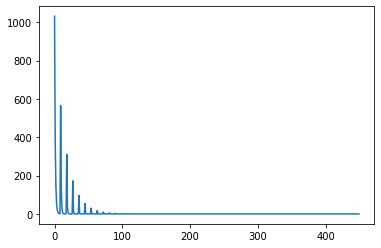

In [42]:
plt.plot(RSS_linear)

# Classification

In [49]:
X_classification,y_classification = make_classification(1500,14)

X_class_train,X_class_test,y_class_train,y_class_test = train_test_split(X_classification,y_classification,.2,123)
X_class_train.shape,y_class_train.shape,X_class_test.shape,y_class_test.shape

((1200, 14), (1200,), (300, 14), (300,))

## KNN

In [50]:
accuracy_KNN = []
for k in range(2,20,2):
    model = KNN.KNNClassifier(k)
    model.fit(X_class_train,y_class_train)
    prediction = model.predict(X_class_test)
    score = metrics.accuracy_score(y_class_test,prediction)
    print(score)
    accuracy_KNN.append(score)

0.8333333333333334
0.8666666666666667
0.87
0.8566666666666667
0.8566666666666667
0.86
0.8633333333333333
0.87
0.87


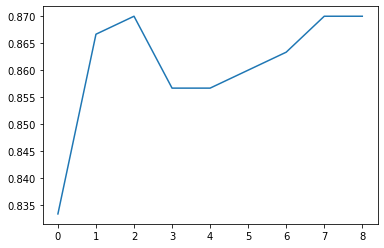

In [51]:
plt.plot(accuracy_KNN)

## Decision Tree

In [54]:
from Models.Tree_3 import DecisionTreeClassifier

In [56]:
import numpy as np
from collections import Counter


def entropy(y):
    probabilities = np.bincount(y) / len(y)

    return np.sum(probabilities * -np.log2(probabilities))


class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        # leaf node is the most below node, which does not have child(s)
        return self.value is not None


class DecisionTreeClassifier:

    def __init__(self, min_samples_size=3, max_depth=5, n_features=None):
        self.min_samples_size = min_samples_size
        self.max_depth = max_depth
        self.n_feats = n_features
        self.root = None

    def fit(self, X, y):
        # how many features to use
        self.n_feats = X.shape[1] if self.n_feats is None else min(self.n_feats, X.shape[1])

        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # print(f"Number of unique labels: {n_labels}")
        if (n_labels == 1) or \
                (n_samples < self.min_samples_size) or \
                (depth >= self.max_depth):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        features_indexes = np.random.choice(n_features, self.n_feats, replace=False)
        best_feature, best_threshold = self._best_criteria(X, y, features_indexes)
        left_indexes, right_indexes = self._split(X[:,best_feature], best_threshold)

        left = self._grow_tree(X[left_indexes, :], y[left_indexes], depth + 1)
        right = self._grow_tree(X[right_indexes, :], y[right_indexes], depth + 1)

        return Node(best_feature, best_threshold, left, right)

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def _best_criteria(self, X, y, features_indexes):

        split_feature_index, split_threshold = None, None
        best_gini = 0

        for index in features_indexes:
            column = X[:, index]
            thresholds = np.unique(column)
            for threshold in thresholds:
                # print(type(column),type(threshold))
                information_gain = self._information_gain(column, y, threshold)

                if best_gini < information_gain:
                    best_gini = information_gain
                    split_feature_index = index
                    split_threshold = threshold
        return split_feature_index, split_threshold

    def _split(self, X_column, threshold):
        # returns indexes of left and right sides
        left_indexes = np.argwhere(X_column < threshold).flatten()
        right_indexes = np.argwhere(X_column >= threshold).flatten()
        return left_indexes, right_indexes

    def _information_gain(self, X_column, y, threshold):

        parent_entropy = entropy(y)

        left_indexes, right_indexes = self._split(X_column, threshold)

        if (len(left_indexes) == 0) or (len(right_indexes) == 0):
            return 0

        left_child, right_child = y[left_indexes], y[right_indexes]
        n = len(y)
        n_left = len(left_child)
        n_right = len(right_child)
        child_weighted_entropy = (n_left / n) * entropy(left_child) + (n_right / n) * entropy(right_child)

        information_gain = parent_entropy - child_weighted_entropy

        return information_gain

    def predict(self, X):
        # starts from root
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):

        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


if __name__ == "__main__":

    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split

    X,y = make_classification(14,13450)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    print("Done")



C:\Users\New User\Desktop\DSB2\ML\ML_From_Scratch\Models\Tree_3.py:8: RuntimeWarning: divide by zero encountered in log2
  return np.sum(probabilities * -np.log2(probabilities))
C:\Users\New User\Desktop\DSB2\ML\ML_From_Scratch\Models\Tree_3.py:8: RuntimeWarning: invalid value encountered in multiply
  return np.sum(probabilities * -np.log2(probabilities))


IndexError: list index out of range